In [1]:

import os
import warnings
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from scipy.spatial import distance
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

In [2]:
def preprocessing_img(img_path):
    # load img
    img = cv2.imread(img_path)
    if img is None:
        print('cant read ', img_path)
        return None, None
    # else:
        # print(img_path)

    # extract features
        # histogram feature
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_img], [0, 1], None, [50, 60], [0, 180, 0, 256])
    hist = hist.flatten() 

        # canny edge feature
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 100, 200)
    edges = edges.flatten()  

    # normalize features
    hist_n = scaler.fit_transform(hist.reshape(-1, 1)).flatten()
    edges_n = scaler.fit_transform(edges.reshape(-1, 1)).flatten()

    # concatenate features
    features = np.concatenate((hist_n, edges_n))

    return features
    



In [3]:
train_data = []
train_label = []
train_path = f"Training/Training"
i = 0
print("========= CREATING TRAIN DATA ==============")
for file_name in os.listdir(train_path):
    
    # load img
    img_path = train_path + '/' + file_name
    features = preprocessing_img(img_path)

    # append features
    train_data.append(features)
    
    # append label
    if file_name[0] == "n":
        train_label.append(0)
    else:
        train_label.append(1)


print("\n\n =========== DONE CREATING TRAIN DATA ============")
print(len(train_label))

========= CREATING TRAIN DATA ==============


 =========== DONE CREATING TRAIN DATA ============
716


In [4]:

test_data = []
test_label = []
test_path = f"Testing/Testing"
print("========= CREATING TEST DATA ==============")
for file_name in os.listdir(test_path):
    
    # load img
    img_path = test_path + '/' + file_name

    # append features to train set
    features = preprocessing_img(img_path)
    test_data.append(features)
    
    # append label
    if file_name[0] == "n":
        test_label.append(0)
    else:
        test_label.append(1)


print("\n\n =========== DONE CREATING TRAIN DATA ============")
print(len(test_label))
print(len(test_data))

========= CREATING TEST DATA ==============


 =========== DONE CREATING TRAIN DATA ============
224
224


In [5]:
print(len(train_label))
print(len(train_data))

716
716


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_label)

KNeighborsClassifier(n_neighbors=3)

In [7]:
preds = knn.predict(test_data)
print(len(preds))
print(metrics.accuracy_score(test_label, preds))

224
0.6205357142857143


not smoking


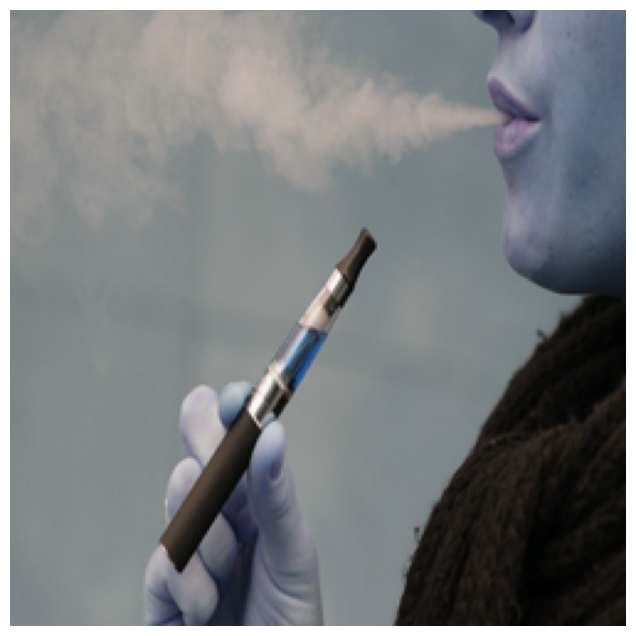

In [17]:



val_path = f"Validation/Validation/smoking_0400.jpg"
img = cv2.imread(val_path)
if img is None:
    print("\nwtf")
img = preprocessing_img(val_path)

pred = knn.predict([img])
if pred == 0:
    print("not smoking")
else:
    print("smoking")

image = cv2.imread(val_path)
# image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.axis("off")
plt.imshow(image)
